# Ctrl Alt Compete 
### Meet the Team:
**Ramya Kurkal** (CMDA Major, minor in Mathematics, Senior)\
**Eshan Kaul** (Computer Science & Economics Dual Degree, minor in Mathematics, Senior)\
**Arya Shah** (Computer Science Major, Senior)\
**Rohith Mahesh** (Computer Science Major, Senior)\
**Anurag Kulkarni** (Business Information Technology, minor in Computer Science, Junior)

# Motivation
* India is the **third largest** global consumer of energy in the world
* Our motivation for this project is to **encourage** the use of renewable energy sources, such as solar energy, in order to **increase sustainability** and conserve foreign economic expenditures
* Solar power reduces greenhouse gas emissions and subsequently, the country’s dependence on fossil fuels
* We would ultimately like to **reduce India’s energy consumption** by predicting the exact amount of energy needed to be produced by Indian solar plants.

# Research Question
**Can we predict Indian solar power production in order to potentially achieve pay-as-you-go pricing?**

* By accurately predicting future solar power plant production, we may be able to optimize spending in order to encourage the use of renewable energy among Indian consumers (residential and commercial alike).
* Achieving this may have significant environmental benefits for not only South Asia, but the world.


# Data Introduction
All the data used in this notebook has been retrieved from Kaggle in the form of a comma separated value file. The data was gathered at **two solar power plants in India over a 34 day period**. The source contains four data sets, however we analyzed two of the four: <u>a plant generation data file and a plant weather sensor data file</u>. The plant generation file is gathered at the inverter level: each inverter has multiple lines of solar panels attached to it (dim: 68778 rows × 7 columns). The sensor data is gathered at a plant level: single array of sensors optimally placed at the plant (dim: 3182 rows × 6 columns).

In [2]:
# Import packages
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import mpmath
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
import math
from scipy.integrate import quad, nquad
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# Read In Data + EDA

In [3]:
plant1_generation = pd.read_csv('Plant_1_Generation_Data.csv') 
display(plant1_generation)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000    6183645.0  
2            0.000    6987759.0  
3            0.000    7602960.0  
4            0.000    7158964.0  
...            ...          ...  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0  

[68778 rows x 7 columns]

In [3]:
plant2_generation = pd.read_csv('Plant_2_Generation_Data.csv')
display(plant2_generation)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1      2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2      2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3      2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4      2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   
...                    ...       ...              ...       ...       ...   
67693  2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
67694  2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
67695  2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
67696  2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
67697  2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

       DAILY_YIELD   TOTAL_YIELD  
0      9425.000000  2.429011e+06  
1         0.000000  1.215279e+09  
2      3075.333333  2.247720e+09  
3       269.933333  1.704250e+06  
4      3177.000000  1.994153e+07  
...            ...           ...  
67693  4157.000000  5.207580e+05  
67694  3931.000000  1.211314e+08  
67695  4322.000000  2.427691e+06  
67696  4218.000000  1.068964e+08  
67697  4316.000000  2.093357e+08  

[67698 rows x 7 columns]

In [12]:
False in plant1_generation.PLANT_ID.isnull()

True

In [4]:
plant1_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
display(plant1_weather)
plant1_weather.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()
plant1_weather_cleaned = plant1_weather.drop(columns=["SOURCE_KEY", "PLANT_ID"], axis = 1)
plant1_weather_cleaned
plant1_weather_cleaned['DATE_TIME'] = pd.to_datetime(plant1_weather_cleaned['DATE_TIME']) 
plant1_weather_cleaned['TIME'] = plant1_weather_cleaned['DATE_TIME'].dt.time 
plant1_weather_cleaned['DATE'] = pd.to_datetime(plant1_weather_cleaned['DATE_TIME'].dt.date)
plant1_weather_cleaned

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0     2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1     2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2     2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3     2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4     2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                   ...       ...              ...                  ...   
3177  2020-06-17 22:45:00   4135001  HmiyD2TTLFNqkNe            22.150570   
3178  2020-06-17 23:00:00   4135001  HmiyD2TTLFNqkNe            22.129816   
3179  2020-06-17 23:15:00   4135001  HmiyD2TTLFNqkNe            22.008275   
3180  2020-06-17 23:30:00   4135001  HmiyD2TTLFNqkNe            21.969495   
3181  2020-06-17 23:45:00   4135001  HmiyD2TTLFNqkNe            21.909288   

      MODULE_TEMPERATURE  IRRADIATION  
0              22.857507          0.0  
1              22.761668          0.0  
2              22.592306          0.0  
3              22.360852          0.0  
4              22.165423          0.0  
...                  ...          ...  
3177           21.480377          0.0  
3178           21.389024          0.0  
3179           20.709211          0.0  
3180           20.734963          0.0  
3181           20.427972          0.0  

[3182 rows x 6 columns]

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
3177 2020-06-17 22:45:00            22.150570           21.480377   
3178 2020-06-17 23:00:00            22.129816           21.389024   
3179 2020-06-17 23:15:00            22.008275           20.709211   
3180 2020-06-17 23:30:00            21.969495           20.734963   
3181 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION      TIME       DATE  
0             0.0  00:00:00 2020-05-15  
1             0.0  00:15:00 2020-05-15  
2             0.0  00:30:00 2020-05-15  
3             0.0  00:45:00 2020-05-15  
4             0.0  01:00:00 2020-05-15  
...           ...       ...        ...  
3177          0.0  22:45:00 2020-06-17  
3178          0.0  23:00:00 2020-06-17  
3179          0.0  23:15:00 2020-06-17  
3180          0.0  23:30:00 2020-06-17  
3181          0.0  23:45:00 2020-06-17  

[3182 rows x 6 columns]

In [5]:
plant2_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
display(plant2_weather)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0     2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1     2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2     2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3     2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4     2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   
...                   ...       ...              ...                  ...   
3254  2020-06-17 22:45:00   4136001  iq8k7ZNt4Mwm3w0            23.511703   
3255  2020-06-17 23:00:00   4136001  iq8k7ZNt4Mwm3w0            23.482282   
3256  2020-06-17 23:15:00   4136001  iq8k7ZNt4Mwm3w0            23.354743   
3257  2020-06-17 23:30:00   4136001  iq8k7ZNt4Mwm3w0            23.291048   
3258  2020-06-17 23:45:00   4136001  iq8k7ZNt4Mwm3w0            23.202871   

      MODULE_TEMPERATURE  IRRADIATION  
0              25.060789          0.0  
1              24.421869          0.0  
2              24.427290          0.0  
3              24.420678          0.0  
4              25.088210          0.0  
...                  ...          ...  
3254           22.856201          0.0  
3255           22.744190          0.0  
3256           22.492245          0.0  
3257           22.373909          0.0  
3258           22.535908          0.0  

[3259 rows x 6 columns]

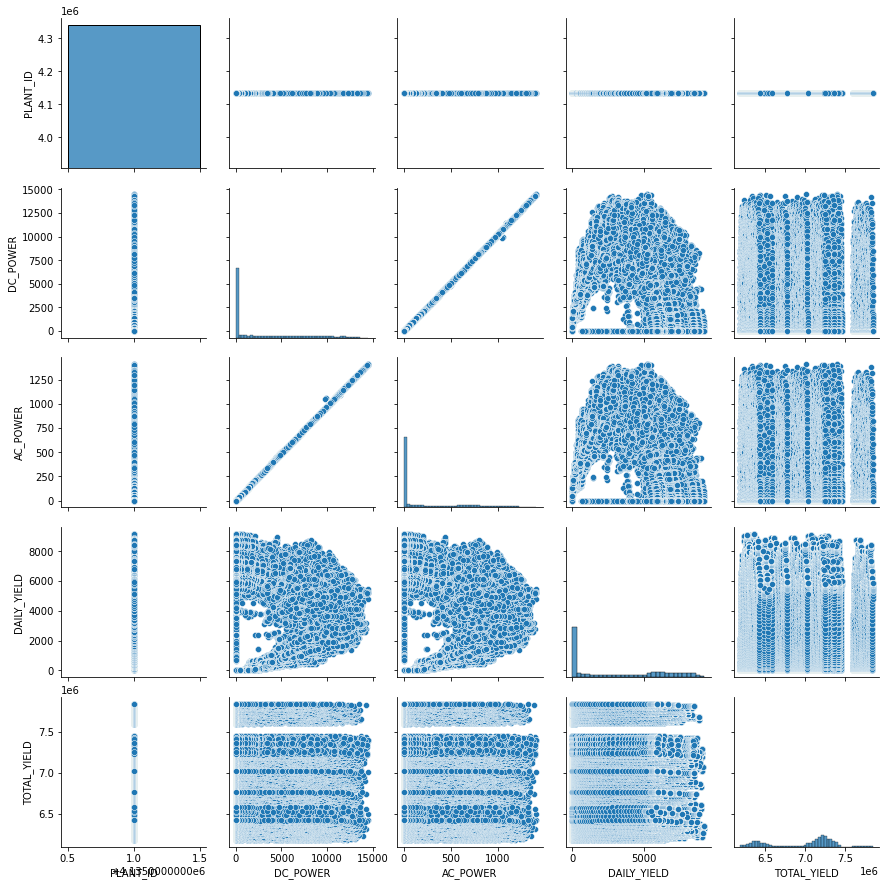

In [6]:
sns.pairplot(plant1_generation)
plt.show()

In [7]:
#Plant 1 generation data
plant1_daily = plant1_generation.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant1_daily['DATE_TIME'] = pd.to_datetime(plant1_daily['DATE_TIME']) 
plant1_daily['TIME'] = plant1_daily['DATE_TIME'].dt.time 
plant1_daily['DATE'] = pd.to_datetime(plant1_daily['DATE_TIME'].dt.date)
fig = px.scatter(plant1_daily, x="TIME", y="DC_POWER", marginal_x="histogram")
fig.show()

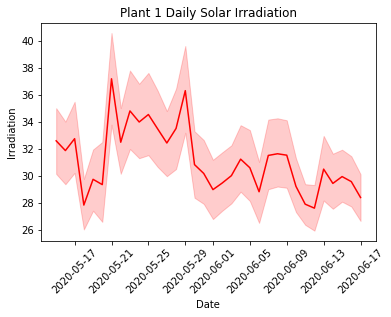

In [8]:
sns.lineplot(x = "DATE", y = "MODULE_TEMPERATURE", data = plant1_weather_cleaned, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 1 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

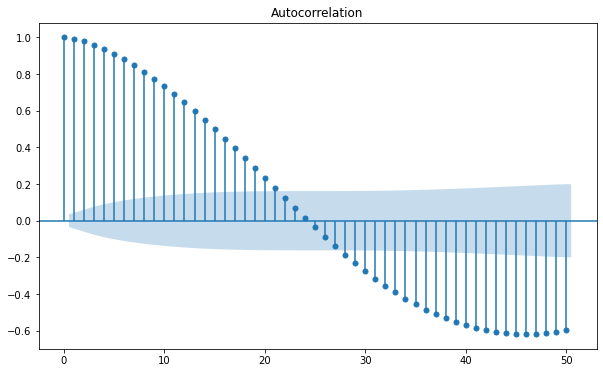

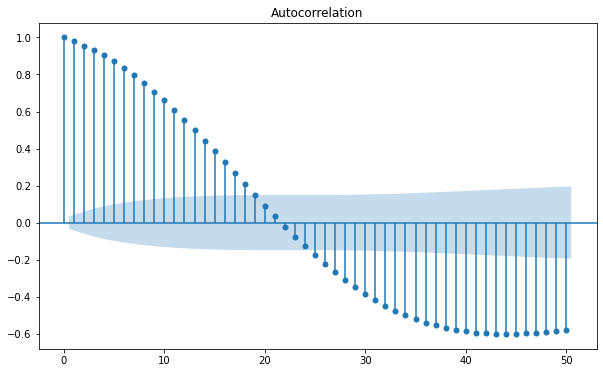

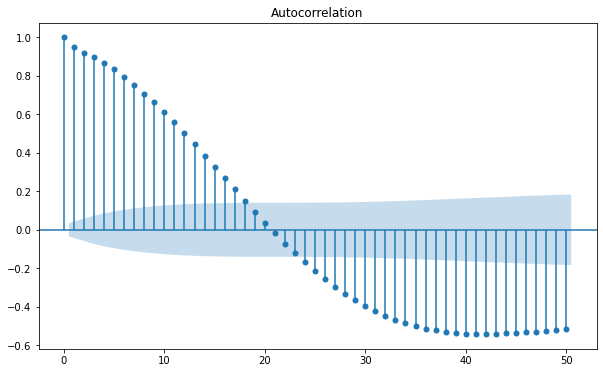

In [9]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(plant1_weather_cleaned['AMBIENT_TEMPERATURE'], lags=50);
sm.graphics.tsa.plot_acf(plant1_weather_cleaned['MODULE_TEMPERATURE'], lags=50);
sm.graphics.tsa.plot_acf(plant1_weather_cleaned['IRRADIATION'], lags=50);

# plot_moving_average(plant1_weather_cleaned, 30, column='IRRADIATION', plot_intervals=True)


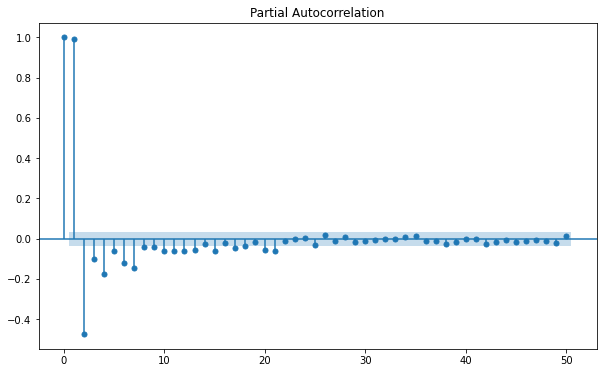

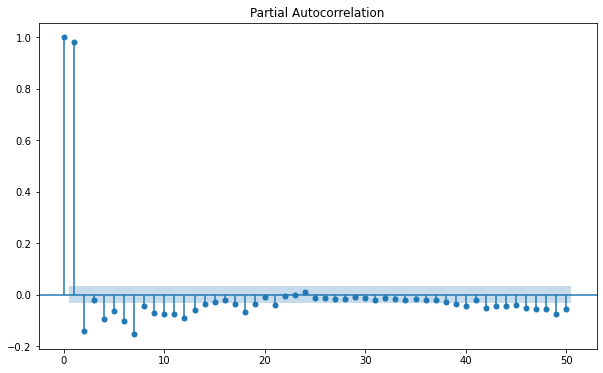

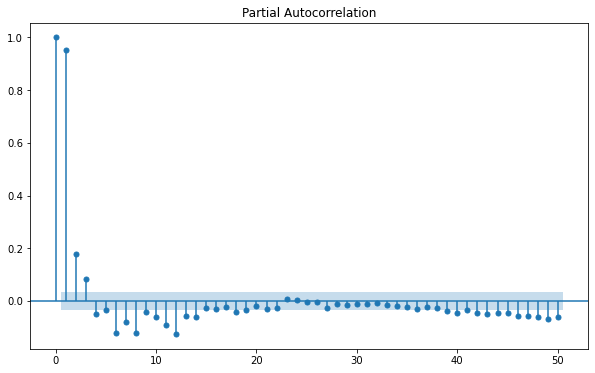

In [10]:
sm.graphics.tsa.plot_pacf(plant1_weather_cleaned['AMBIENT_TEMPERATURE'], lags=50);
sm.graphics.tsa.plot_pacf(plant1_weather_cleaned['MODULE_TEMPERATURE'], lags=50);
sm.graphics.tsa.plot_pacf(plant1_weather_cleaned['IRRADIATION'], lags=50);

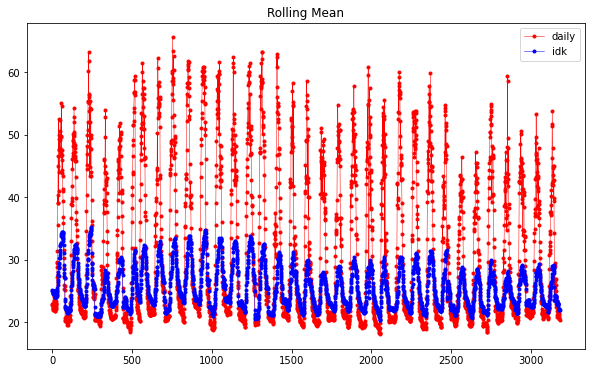

In [11]:
moving_avg = plant1_weather_cleaned.rolling(window=2).mean()
# plt.plot(plant1_weather_cleaned["IRRADIATION"], marker='.', linestyle='-', linewidth=0.5, label='daily', c='b')
plt.plot(plant1_weather_cleaned["MODULE_TEMPERATURE"], marker='.', linestyle='-', linewidth=0.5, label='daily', c='r')
plt.plot(plant1_weather_cleaned["AMBIENT_TEMPERATURE"], marker='.', linestyle='-', linewidth=0.5, label='idk', c='b')
# plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='black', label='Rolling Mean');
plt.legend(loc='best')
plt.title('Rolling Mean');

In [12]:
print(plant1_generation)
plant1_generation.size

              DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000    6183645.0  
2        

481446

In [13]:
plant1_generation['DATE_TIME'] = pd.to_datetime(plant1_generation["DATE_TIME"])
plant1_weather['DATE_TIME'] = pd.to_datetime(plant1_weather["DATE_TIME"])
df = pd.merge(plant1_generation.drop(columns=['PLANT_ID']), plant1_weather.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0     2020-05-15 00:00:00  1BY6WEcLGh8j5v7       0.0       0.0        0.000   
1     2020-05-15 00:00:00  1IF53ai7Xc0U56Y       0.0       0.0        0.000   
2     2020-05-15 00:00:00  3PZuoBAID5Wc2HD       0.0       0.0        0.000   
3     2020-05-15 00:00:00  7JYdWkrLSPkdwr4       0.0       0.0        0.000   
4     2020-05-15 00:00:00  McdE0feGgRqW7Ca       0.0       0.0        0.000   
...                   ...              ...       ...       ...          ...   
45675 2020-06-17 23:45:00  uHbuxQJl8lW7ozc       0.0       0.0     5967.000   
45676 2020-06-17 23:45:00  wCURE6d3bPkepu2       0.0       0.0     5147.625   
45677 2020-06-17 23:45:00  z9Y9gH1T5YWrNuG       0.0       0.0     5819.000   
45678 2020-06-17 23:45:00  zBIq5rxdHJRwDNY       0.0       0.0     5817.000   
45679 2020-06-17 23:45:00  zVJPv84UY57bAof       0.0       0.0     5910.000   

       TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0        6259559.0            25.184316           22.857507          0.0  
1        6183645.0            25.184316           22.857507          0.0  
2        6987759.0            25.184316           22.857507          0.0  
3        7602960.0            25.184316           22.857507          0.0  
4        7158964.0            25.184316           22.857507          0.0  
...            ...                  ...                 ...          ...  
45675    7287002.0            21.909288           20.427972          0.0  
45676    7028601.0            21.909288           20.427972          0.0  
45677    7251204.0            21.909288           20.427972          0.0  
45678    6583369.0            21.909288           20.427972          0.0  
45679    7363272.0            21.909288           20.427972          0.0  

[45680 rows x 9 columns]

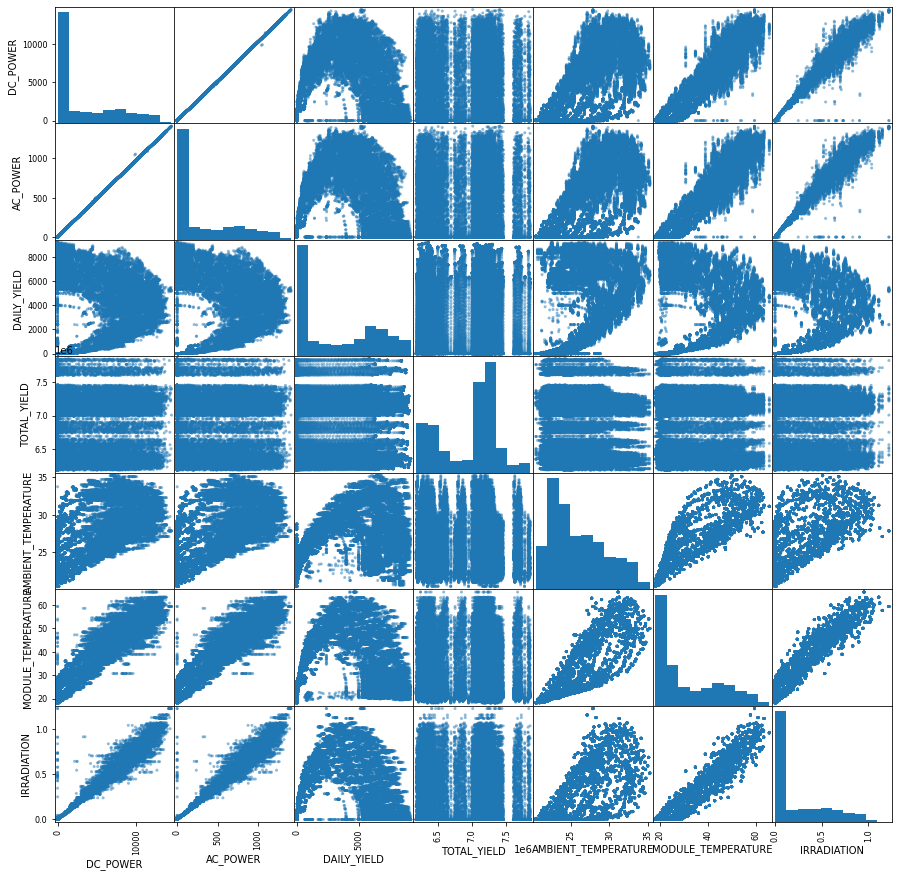

In [14]:
pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.show()

### Correlation
Definition: Any statistical relationship, whether causal or not, between two random variables or bivariate data. The Correlation Coefficient or Pearson correlation coefficient is commonly obtained by taking the ratio of the covariance of the two variables in question from the numerical dataset, normalized to the square root of their variances. Mathematically, it is the division of the covariance (joint variability of two random variables) of the two variables by the product of their standard deviations.

$$ \rho X,Y = \text{corr(X,Y)} = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}  = \frac{E[(X-{\mu}x)(Y-{\mu}y)]}{\sigma_x \sigma_y}$$


$$ \text{cov}(X, Y) = E[(X - E[X])(Y - E[Y])]$$

For further details see: https://en.wikipedia.org/wiki/Correlation

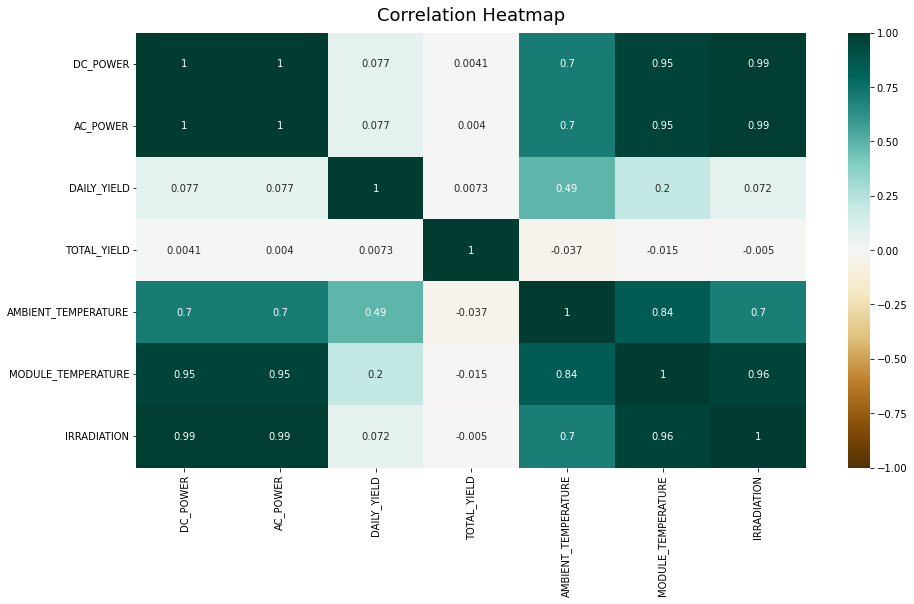

In [15]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='twilight')

# Exploratory Data Analysis Cntd.

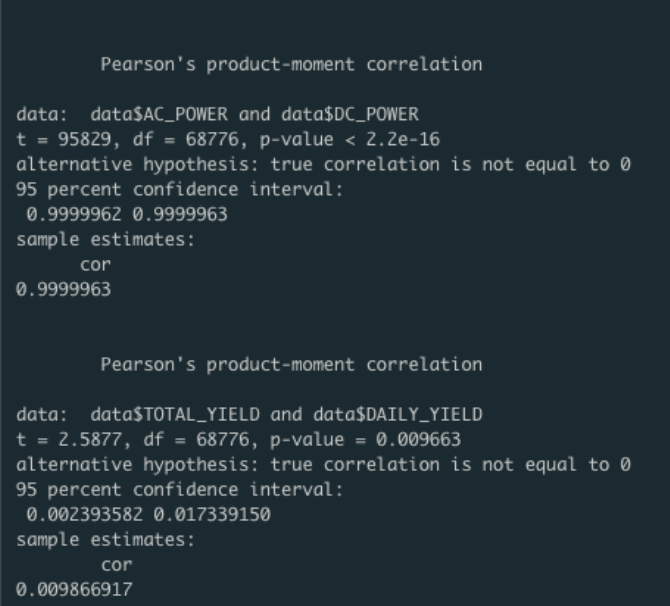

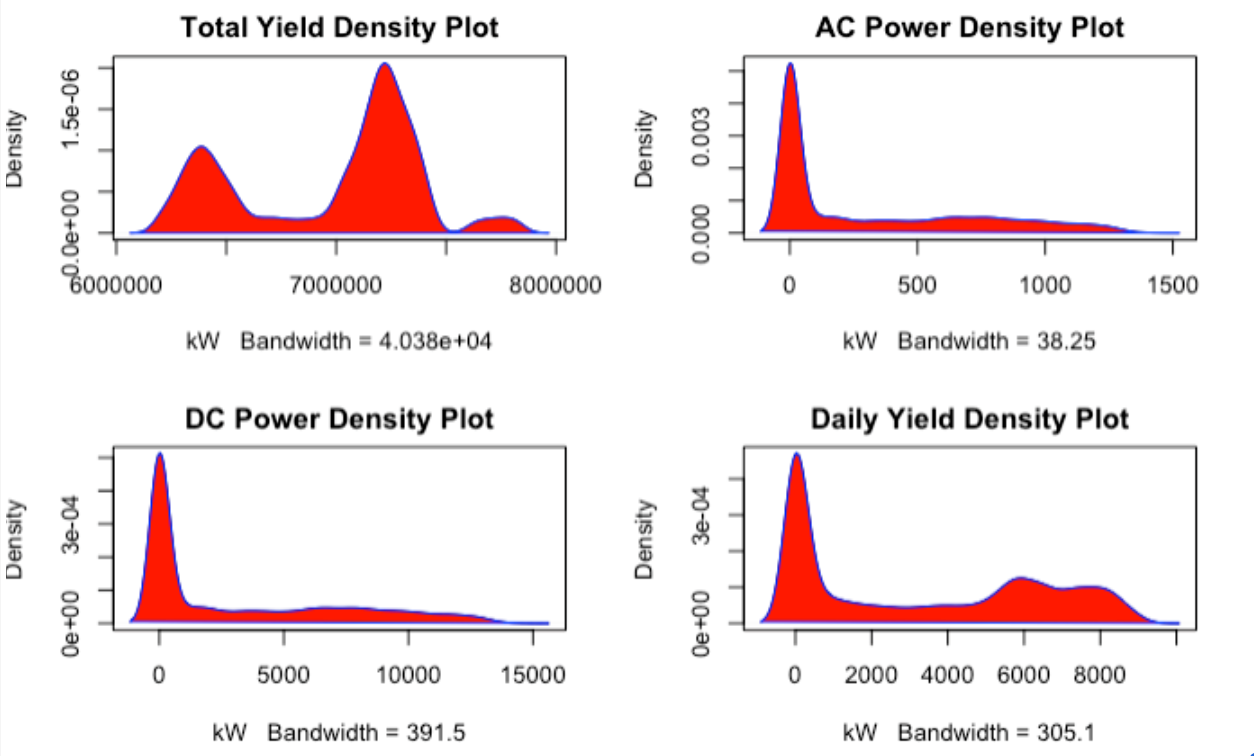

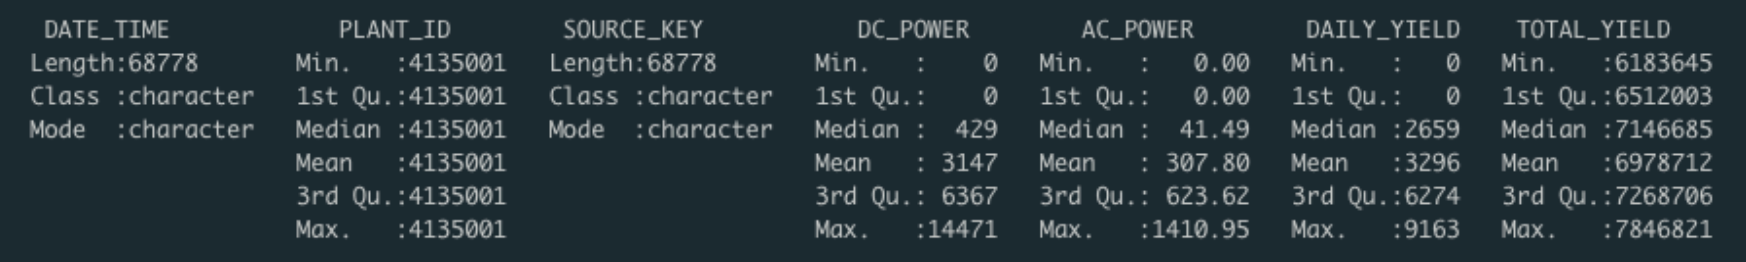

# EDA Discussion

### Correlation Analysis & Pairs Plot
The AC_Power and DC_Power variables are very linearly correlated, we use pairs to discover that there is little multicollinearity in the data which makes our set suitable for multiple machine learning techniques.

### Density Plots
From the density plots, we are able to observe the general distribution of our most significant factors. It is clear to see that the AC and DC density plots are very similar which lines up with the argument that the two variables are strongly correlated. We are also able to observe that total yield is on a much larger scale due to the fact that it is a running sum of the daily yield.

### Summary Statistics
Basic summary statistics help us understand the nature of the data


# Solution Approach

In this notebook, we will explore a machine learning technique called **Regression Voting Ensemble with soft voting**. Regression Voting Ensemble is a model that works by combining multiple different machine learning techniques in order to average all of their results to choose the optimal prediction for the data.

Soft voting is the process of averaging the probabilities of all the estimators combined.

Within our Ensemble Voting model, we **averaged the probability** results of Random Forests algorithm, Linear Regression algorithm, Orthogonal Matching Pursuit, and Gradient Boosting Regressor to find the ideal voting regressor for our set.


In [17]:
encoder = LabelEncoder()
df['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df['SOURCE_KEY'])
print(df.info())
df_downbad = df.copy()
X = df[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            45680 non-null  datetime64[ns]
 1   SOURCE_KEY           45680 non-null  object        
 2   DC_POWER             45680 non-null  float64       
 3   AC_POWER             45680 non-null  float64       
 4   DAILY_YIELD          45680 non-null  float64       
 5   TOTAL_YIELD          45680 non-null  float64       
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
 9   SOURCE_KEY_NUMBER    45680 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 3.8+ MB
None


The OLS is a strong modeling tool that is often used in econometrics for forecasting future markets.<br> 

The purpose of the OLS is to take a theoretical equation: $Y_{i} = {\beta}_{0} + {\beta}_{1}X_{i} + {\beta}_{2}X_{i} + {\beta}_{3}X_{i} + {\beta}_{4}X_{i} + {\epsilon}$ (1.1)<br>
to create the estimated equation: $\hat{Y_{i}} = \hat{\beta}_{0} + \hat{\beta}_{1}X_{i} + \hat{\beta}_{2}X_{i} + \hat{\beta}_{3}X_{i} + \hat{\beta}_{4}X_{i}$  (1.2)<br> 

This is achived by minimizing the sum of the squared residuals.

$$SS_{res}=\sum{e_i}^2=\sum\limits_{i=1}^n{(y_i-\hat{y_i})^2}=\sum\limits_{i=1}^n(y_i-(\hat{\beta_0}+\hat{\beta_1}x_i))^2$$ <br>
We call the above equition the **sum of squares for the residuals ($SS_{res}$)**. Our best estimated line, then, is the one which minimizes the $SS_{res}$. <br> <br>
Minimizing $e$ solvews the normal equations<br>
$$\frac{\partial SS_{res}}{\partial \hat{\beta_0}}=-2\sum\limits_{i=1}^n[y_i-\hat{\beta_0}-\hat{\beta_1}x_i]=0$$ <br>
$$\frac{\partial SS_{res}}{\partial \hat{\beta_1}}=-2\sum\limits_{i=1}^n[x_iy_i-\hat{\beta_0}x_i-\hat{\beta_1}x_i^2]=0$$ <br>
<br>
$$n\hat{\beta_0}+\hat{\beta_1}\sum\limits_{i=1}^n{x_i}=\sum\limits_{i=1}^n{y_i}$$ <br> 
<br>
$$\hat{\beta_0}\sum\limits_{i=1}^n{x_i}+\hat{\beta_1}\sum\limits_{i=1}^n{x_i^2}=\sum\limits_{i=1}^n{x_iy_i}$$ <br>
Let $$\bar{x}=\frac{1}{n}\sum\limits_{i=1}^n{x_i}$$ and $$\bar{y}=\frac{1}{n}\sum\limits_{i=1}^n{y_i}$$ be the sample means of predictor values
and the responses. If <br>
$$S_{xy}=\sum\limits_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}=\sum\limits_{i=1}^ny_i(x_i-\bar{x})=\sum\limits_{i=1}^nx_iy_i-n\bar{x}\bar{y}$$ <br>
$$S_{xx} = \sum\limits_{i=1}^n{(x_i-\bar{x})}^2=\sum\limits_{i=1}^n{x_i}-n\bar{x}^2$$ <br>
$SS_{xx}$ is the sum of the squares of the difference between each 𝑥 and the mean 𝑥 value, and <br>
$SS_{xy}$ is sum of the product of the difference between 𝑥 its means and the difference between 𝑦 and its mean.
$$S_{yy} = \sum\limits_{i=1}^n{(y_i-\bar{y})}^2=\sum\limits_{i=1}^n{y_i}-n\bar{y}^2$$ <br>
then the values for $\hat{\beta_0}$ and $\hat{\beta_1}$ minimizing $e$ or, equivalently, solving the
normal equations are <br>
$$\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}$$ <br>
$$\hat{\beta_1}=\frac{S_{xy}}{S_{xx}}$$


In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print(f"Score is {lr_score*100:.4f} %")
print("MSE:", mean_squared_error(y_test, lr.predict(X_test)))

scores = cross_val_score(lr, X, y, cv=5)
scores.mean()


Score is 98.1625 %
MSE: 2882.6634507138824


0.9814090985731324

# Random Forest
Random forests are a type of **ensemble learning** method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. In a random forest, each tree is built from a **Bootstrap Aggregation** or **bagging** technique from the training set. Bootstrap refers to random sampling with replacement. Bagging is a general procedure that can be used to reduce the variance for those algorithms that have high variance, typically decision trees. Additionally, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. This introduces randomness into the model.

The **random forest regressor** is used for regression tasks, similar to a random forest classifier. The main difference is that instead of outputting a class, it **outputs a continuous value**.

During the training process, the algorithm builds multiple decision trees, each of which is trained on a different subset of the data. Each tree makes a prediction, and the final output of the random forest regressor is the average of all of the tree's predictions.

In addition to averaging the predictions, the use of multiple decision trees allows for the model to capture a wider range of relationships in the data. The random subsampling of features when splitting a node also helps to decorrelate the trees, which reduces overfitting and improves the overall performance of the model.




Let $X$ be a training set where $X = x_1, ..., x_n$ with responses $Y = y_1, ..., y_n$ Drawing $B$ bootstrap samples (selecting random samples with replacement) yeilds tree classifiers $h_1, ..., h_B$ 

Then combining the classifiers we have: 

   $$ h(x) =   \left\{
\begin{array}{ll}
      1 & \text{if } \frac{1}{B}\sum_{j}{h_{j}(x)} \le \frac{1}{2} \\
      0 & otherwise \\
\end{array} 
\right.  $$

For each tree an estimate prediction error is generated. 

$$\hat{m}(x) = \frac{1}{M}\sum_{j}{\hat{m}_{j}(x)}$$

Where $\hat{m}_{j}$ is the tree estimator based on the bootstraped sample of size $a$ using $p$ randomly selected features. Taking the average of the prediction errors yeilds the **out of bag error estimate**. 

In [19]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")
print("MSE:", mean_squared_error(y_test, rfr.predict(X_test)))

scores = cross_val_score(rfr, X, y, cv=5)
scores.mean()

Score is 99.0469 %
MSE: 1495.1938419305563


0.9754553228536139

# K Nearest Neighbor

In [20]:
score_list = []
n_neighbors_list = []
# for loop to find best fitting n_neighbor value
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_score = knn.score(X_test, y_test)
    score_list.append(knn_score)
    n_neighbors_list.append(i)
best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Best n_neighbor at {best_n_neighbor} with {max(score_list)*100:.4f} %")
print("MSE:", mean_squared_error(y_test, knn.predict(X_test)))

Best n_neighbor at 3 with 88.1611 %
MSE: 41409.96906426754


# Gradient Boosting
Gradient Boosting is an ensemble machine learning algorithm that can be used for both classification and regression tasks. It is a type of boosting algorithm, which works by combining several weak models (decision trees) to create a strong model.

The **goal** of gradient boosting is to train a sequence of decision trees, where each tree tries to correct the mistakes made by the previous tree. The algorithm starts by fitting a simple decision tree to the data, and then uses the residuals (the difference between the predicted values and the true values) as the target for the next tree. This process is repeated multiple times, and the final prediction is obtained by combining the predictions of all the trees.

Mathmatically we seek to find the nonlinear predictor $\hat{h}(x) \in \mathcal{H}$ such that $$\hat{h} =\underset{h \in \mathcal{H}}{\operatorname{arg max}}{\mathcal{L}(h(X), Y)}$$


The main advantage of Gradient Boosting is that it can handle non-linear relationships between the input variables and the output variable, and it can also handle missing values and outliers in the data.

One of the key components behind Gradient Boosting is the concept of gradient descent, which is used to minimize the loss function. In Gradient Boosting, the loss function is typically the **mean squared error (MSE)** or the mean absolute error (MAE) **for regression problems** and the **cross-entropy loss for classification problems**.

The **square loss (regression)** function can be represented mathematically as:
$$\mathcal{L}(h(X), Y) = \sum_{i=1}^{n} (h(x_i) - y_i)^2$$



In [21]:
est = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
    loss='ls'
).fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, est.predict(X_test)))
est_score = est.score(X_test, y_test)
print(f"Score is {est_score*100:.4f} %")

MSE: 2462.2933372711177
Score is 98.4304 %


# Partial Least Squares Cononical

PLS Cononical is a type of **multivariate statistical analysis** that is useful for analyzing the relationship between a large number of X variables and a small number of Y variables. The **goal** of the analysis is to find the linear combinations of X variables that explain the most variance in the Y variables. This is done by finding linear combinations of X variables that are highly correlated with the Y variables.

**Procedure:** The PLS canoncial method starts by defining a set of **latent components** or **latent factors**, that are linear combinations of the X variables. These latent variables are then used to model the Y variables. The method finds the linear combination of the X variables that maximizes the covariance between the latent variables and the Y variables.

Given two centered matrices $X \in \mathbb{R}^{n \times d}$ and $Y \in \mathbb{R}^{n \times t}$, and a number of components K, the PLSCanonical proceedure is: <be>
    
Set $X_1$ to $X$ and $Y_1$ to $Y$. For each $k \in [1, K]$:<be>    
    
compute $u_k \in \mathbb{R}^d$ and $u_k \in \mathbb{R}^d$ the first left and right singular vectors of the cross-covariance matrix $C = X_k^T Y_k$ by computing the SVD of C storing the largest singular vectors. $u_k$ and $v_k$ are weights chosen to maximize the covariance between projected $X_k$ and the projected target $\text{Cov}(X_k u_k, Y_k v_k)$<be>
    
Project $X_k$ and $Y_k$ on the singular vectors to obtain the scores: $\xi_k = X_k u_k$ and $\omega_k = Y_k v_k$ <be>

Then regress $X_k$ on $\xi_k$ finding a loading vector $\gamma_k \in \mathbb{R}^d$ such that the rank 1 matrix $\xi_k \gamma_k^T$ minimizes the distance to $X_k$<be>

Regressing $Y_k$ on $\gamma_k$ similarly yeilds the loading vector $\delta_k$<be>
    
Finally deflate $X_k$ and $Y_k$ by taking the difference of the rank 1 approximations: $X_{k+1} = X_k - \xi_k \gamma_k^T$ and $Y_{k + 1} = Y_k - \omega_k \delta_k^T$<be>
    
The resulting model approximates $X$, as a sum of rank 1 matrices $X = \Xi \Gamma^T$ where columns $\Xi \in \mathbb{R}^{n \times K}$ contains the scores and rows $\Gamma^T \in \mathbb{R}^{K \times d}$ contains the loading vectors, and $Y = \Omega \Delta^T$ where $\Xi$ and $\Omega$ are projections for the traing data X and Y. 

In [23]:
from sklearn.cross_decomposition import PLSCanonical
plsca = PLSCanonical(n_components=1)
plsca.fit(X_train, y_train)
X_c, Y_c = plsca.transform(X_train, y_train)
plsca_score = plsca.score(X_test, y_test)
print(f"Score is {plsca_score*100:.4f} %")
print("MSE:", mean_squared_error(y_test, plsca.predict(X_test)))

Score is 72.5869 %
MSE: 43005.020332652915


# Orthogonal Matching Pursuit

In [24]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import make_regression
omp = OrthogonalMatchingPursuit(normalize=True).fit(X_train, y_train)
omp.score(X_train, y_train)
omp_score = omp.score(X_test, y_test)
print(f"Score is {omp_score*100:.4f} %")
print("MSE:", mean_squared_error(y_test, omp.predict(X_test)))


Score is 98.1363 %
MSE: 2923.6558068422487


In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor

final_layer_rfr = RandomForestRegressor(
    n_estimators=10, max_features=1, max_leaf_nodes=5,random_state=42)
final_layer_gbr = GradientBoostingRegressor(
    n_estimators=10, max_features=1, max_leaf_nodes=5,random_state=42)
final_layer = StackingRegressor(
    estimators=[('rf', final_layer_rfr),
                ('gbrt', final_layer_gbr)],
    final_estimator=RidgeCV()
    )
multi_layer_regressor = StackingRegressor(
    estimators=[('ridge', RidgeCV()),
                ('lasso', LassoCV(random_state=42)),
                ('knr', KNeighborsRegressor(n_neighbors=20,
                                            metric='euclidean'))],
    final_estimator=final_layer
)
multi_layer_regressor.fit(X_train, y_train)

print('R2 score: {:.2f}'
      .format(multi_layer_regressor.score(X_test, y_test)))

multi_layer_regressor_score = multi_layer_regressor.score(X_test, y_test)
print(f"Score is {multi_layer_regressor_score*100:.4f} %")
print("MSE:", mean_squared_error(y_test, multi_layer_regressor.predict(X_test)))

R2 score: 0.95
Score is 94.7549 %
MSE: 8228.357364446465


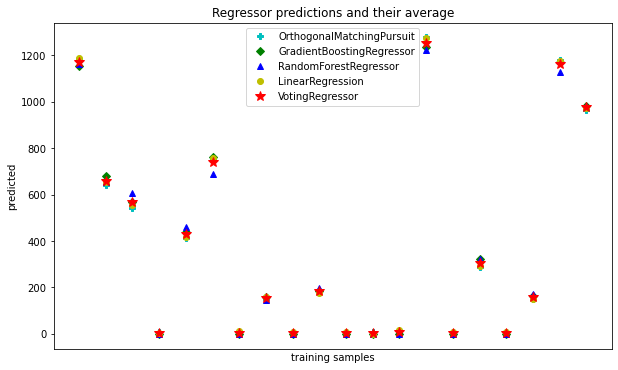

In [28]:
# Train classifiers
svr = svm.SVR()
plsca = PLSCanonical(n_components=1)
omp = OrthogonalMatchingPursuit(normalize=True)
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

svr.fit(X_train, y_train)
plsca.fit(X_train, y_train)
omp.fit(X_train, y_train)
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

ereg = VotingRegressor([("omp", omp), ("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_train, y_train)

xt = X_train[:20]

predsvr = svr.predict(xt)
predplsca = plsca.predict(xt)
predomp = omp.predict(xt)
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

plt.figure()
plt.plot(predomp, "cP", label="OrthogonalMatchingPursuit")
plt.plot(pred1, "gD", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "yo", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

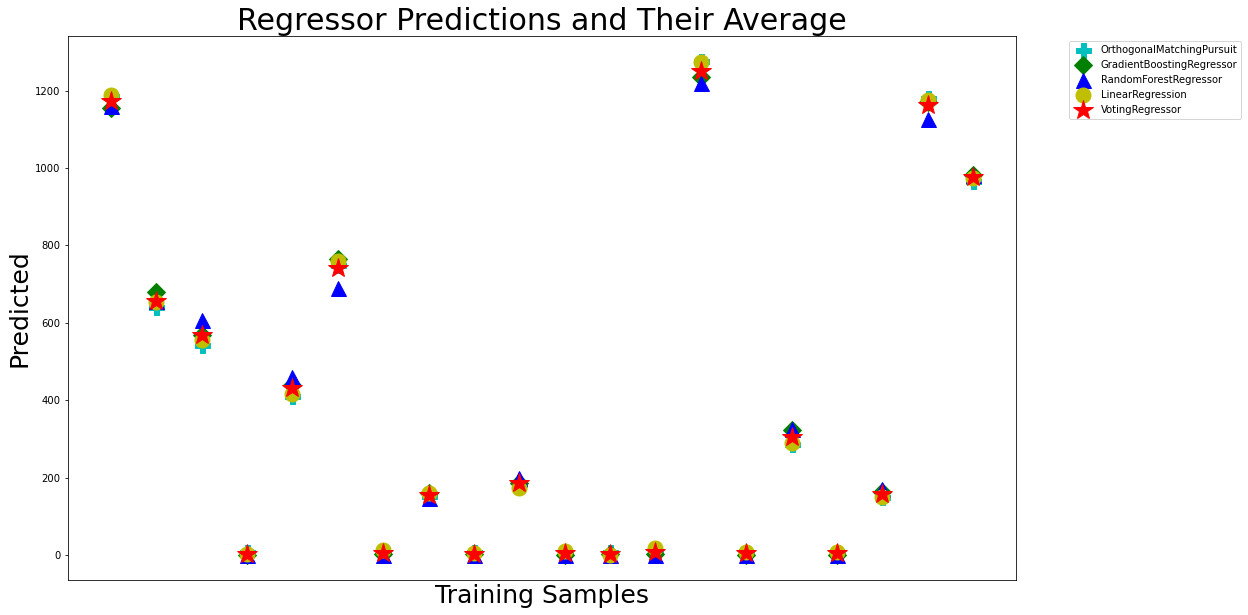

In [29]:
plt.figure(figsize=(17, 10))

plt.plot(predomp, "cP", ms=15, label="OrthogonalMatchingPursuit")
plt.plot(pred1, "gD", ms=13, label="GradientBoostingRegressor")
plt.plot(pred2, "b^", ms=15, label="RandomForestRegressor")
plt.plot(pred3, "yo", ms=15, label="LinearRegression")
plt.plot(pred4, "r*", ms=20, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
# plt.ylabel("predicted")
# plt.xlabel("training samples")
plt.xlabel('Training Samples', fontsize=25)
plt.ylabel('Predicted', fontsize=25)
plt.legend(loc="best")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.rcParams.update({'font.size': 25})
# font = {'size': 20}
# plt.rc('font', **font)
plt.title("Regressor Predictions and Their Average")

plt.show()

# Interpretations of Results 
By observing our Ensemble Voting model, we are able to predict the ideal values combining the results of Linear Regression (model accuracy: 98.16%), Random Forests (model accuracy: 99.0565%), Gradient Boosting (model accuracy: 98.4304%), and Orthogonal Matching Pursuit (model accuracy: 98.1363%). By averaging all of these probabilities, we are able to conclude that the **overall Ensemble model accuracy is 98.7468%**. By using Ensemble Voting Regression, we are able to account for possible overfitting of the data by individual machine learning models. Instead, we are able to optimize the prediction choice by averaging the results of all of them.


# Limitations
* Data limitations regarding weather, our model may not accurately predict power plant output given seasonal and/or climate changes.
* Because of the nature of the ensemble voting technique (combining 6 machine learning algorithms and averaging them) can be computationally exhaustive, causing increase in runtime.


# Potential Ethical Concerns
* The model could potentially be misused by a solar plant could potentially overcharge after predicting the optimal price point 
* The model can also be misused by targeting higher class consumers when the model forecasts lower total yield for the day


# Citations:
https://ourworldindata.org/renewable-energy 
https://www.kaggle.com/datasets/anikannal/solar-power-generation-data?resource=download 
https://www.nachi.org/advantages-solar-energy.htm 
https://www.energy.gov/energysaver/benefits-residential-solar-electricity 
https://www.investopedia.com/articles/investing/053015/pros-and-cons-solar-energy.asp 
https://machinelearningmastery.com/voting-ensembles-with-python/ 

# Other Methods Explored ⬇

In [22]:
from sklearn import svm
svr = svm.SVR()
svr.fit(X_train, y_train)
prediction = svr.predict(X_train)
print(prediction)
# print("MSE:", mean_squared_error(y_test, prediction))
svr_score = svr.score(X_test, y_test)
print(f"Score is {svr_score*100:.4f} %")

[42.88085781 43.04353634 43.10445261 ... 42.96440616 42.98319508
 43.31241729]
Score is -46.5625 %


In [ ]:
predsvr = svr.predict(xt)
predplsca = plsca.predict(xt)
predomp = omp.predict(xt)
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
# pred4 = ereg.predict(xt)

plt.figure()
# plt.plot(predsvr, "r^", label="predsvr")
plt.plot(predplsca, "r*", label="predplsca")
plt.plot(predomp, "gs", label="predomp")
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
# plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X = df[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER']

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999


In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)
# #create an object of the type GaussianNB
# gnb = GaussianNB()
# #train the algorithm on training data and predict using the testing data
# pred = gnb.fit(data_train, target_train).predict(data_test)
# #print(pred.tolist())
# #print the accuracy score of the model
# print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

In [ ]:
# from sklearn.cross_decomposition import CCA
# cca = CCA(n_components=1)
# cca.fit(X_train, y_train)
# X_c, Y_c = cca.transform(X, Y)
# cca_score = cca.score(X_test, y_test)
# print(f"Score is {cca_score*100:.4f} %")
# print("MSE:", mean_squared_error(y_test, cca.predict(X_test)))

In [ ]:
# import numpy as np
# from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# Y = np.array([1, 1, 2, 2])
# # Always scale the input. The most convenient way is to use a pipeline.
# clf = make_pipeline(StandardScaler(),
#                     SGDClassifier(max_iter=1000, tol=1e-3))
# clf.fit(X, Y)
# print(clf.predict([[-0.8, -1]]))
# clf_score = clf.score(X_test, y_test)
# print(f"Score is {clf_score*100:.4f} %")
# print("MSE:", mean_squared_error(y_test, clf.predict(X_test)))

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
X, y = load_diabetes(return_X_y=True)

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X, y)


In [ ]:
X, y = load_diabetes(return_X_y=True)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, y)

xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [ ]:
#!pip install -U scikit-learn --user
# need to run this on google colab
from itertools import product
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression



encoder = LabelEncoder()
df['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df['SOURCE_KEY'])
print(df.info())
df_downbad = df.copy()
X = df[['DAILY_YIELD']]
y = df['AC_POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)


heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
# Number of rounds to fit and evaluate an estimator.
rounds = 10

classifiers = [
    (
        ("DTC", DecisionTreeClassifier(max_depth=4)),
        ("KNN", KNeighborsClassifier(n_neighbors=7)),
        ("SVC", SVC(gamma=0.1, kernel="rbf", probability=True)),
    )

]

xx = 1.0 - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=i, random_state=rng
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

In [ ]:
encoder = LabelEncoder()
df['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df['SOURCE_KEY'])
print(df.info())
df_downbad = df.copy()
X = df[['DAILY_YIELD']]
y = df['AC_POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

from sklearn.cross_decomposition import PLSCanonical


from sklearn.cross_decomposition import PLSCanonical
plsca = PLSCanonical(n_components=1)
plsca.fit(X_train, y_train)
X_c, Y_c = plsca.transform(X_train, y_train)
plsca_score = plsca.score(X_test, y_test)
print(f"Score is {plsca_score*100:.4f} %")
print("MSE:", mean_squared_error(y_test, plsca.predict(X_test)))

plsca = PLSCanonical(n_components=1)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)


import matplotlib.pyplot as plt

# On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train", marker="o", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test", marker="o", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title(
    "Comp. 1: X vs Y (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1]
)
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train", marker="o", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test", marker="o", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title(
    "Comp. 2: X vs Y (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1]
)
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train", marker="*", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test", marker="*", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title(
    "X comp. 1 vs X comp. 2 (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1]
)
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train", marker="*", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test", marker="*", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title(
    "Y comp. 1 vs Y comp. 2 , (test corr = %.2f)"
    % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1]
)
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
encoder = LabelEncoder()
df['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df['SOURCE_KEY'])
print(df.info())
df_downbad = df.copy()
X = df[['DAILY_YIELD']]
y = df['AC_POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)
from sklearn.cross_decomposition import PLSCanonical
plsca = PLSCanonical(n_components=1)
plsca.fit(X_train, y_train)
X_c, Y_c = plsca.transform(X_train, y_train)
plsca_score = plsca.score(X_test, y_test)
print(f"Score is {plsca_score*100:.4f} %")
print("MSE:", mean_squared_error(y_test, plsca.predict(X_test)))

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

https://scikit-learn.org/stable/modules/ensemble.html

https://www.kaggle.com/code/bpncool/data-exploration-visualize-hourly-variation

https://www.kaggle.com/code/lumierebatalong/solar-power-machine-learning-i

https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py